# Concevez une application au service de la santé publique

# Exploration du DataFrame '**data**'

# 1. Exploration du DataFrame 'data'

Notre DataFrame est maintenant complètement nettoyé et renseigné.<br>
Nous allons maintenant l'explorer à travers différentes analyse univariés <br>
et bivariés ainsi que plusieurs études statistiques.

<u>Voici les étapes de notre analyse</u> :
1. Analyse des corrélations entre features
2. Analyse univariés et bi-variés
3. Analyse de la Variance (Aussi appelé ANOVA pour **AN**alysis **O**f **VA**riance)
4. **A**nalyse en **C**omposante **P**rincipale (ACP)

# 2. Import, paramétrage du notebook et import du DataFrame 'data' nettoyé

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
# Modification des paramètres de Pandas pour 
# pouvoir afficher plus de lignes et plus de colonnes.
pd.set_option("max_rows", 200)
pd.set_option("display.max_columns",200)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Import du Dataframe '**data**' nettoyé précédemment via *pickle*.

In [4]:
data = pickle.load(open('data_clean', 'rb'))

In [4]:
data.columns

Index(['code', 'created_t', 'last_modified_t', 'product_name', 'nutrigrade',
       'pnns_groups_1', 'pnns_groups_2', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutriscore'],
      dtype='object')

# 3. Corrélation

## 3.1 Affichage des informations de corrélation

Affiche les corrélations entre chaque colonne 2 à 2.
Les valeurs vont de 1 à -1 :
- 1 indique que deux colonnes sont très corrélées entre-elles
- 0 indique qu'il n'existe pas de corrélation
- -1 indique que les deux colonnes sont anti-corrélé entre-elles

In [5]:
data.corr()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
energy-kcal_100g,1.00000,1.00000,0.79172,0.58835,0.37785,0.25021,0.23987,0.15776,0.00251,0.00220
energy_100g,1.00000,1.00000,0.79172,0.58835,0.37785,0.25021,0.23987,0.15776,0.00251,0.00220
fat_100g,0.79172,0.79172,1.00000,0.71193,-0.15489,-0.09586,0.03039,0.12878,0.05046,0.04981
saturated-fat_100g,0.58835,0.58835,0.71193,1.00000,-0.08411,0.00721,-0.02003,0.15643,0.02266,0.02232
carbohydrates_100g,0.37785,0.37785,-0.15489,-0.08411,1.00000,0.69861,0.34718,-0.21938,-0.14649,-0.14533
sugars_100g,0.25021,0.25021,-0.09586,0.00721,0.69861,1.00000,0.11309,-0.30999,-0.17585,-0.17429
fiber_100g,0.23987,0.23987,0.03039,-0.02003,0.34718,0.11309,1.00000,0.02960,-0.04173,-0.04161
proteins_100g,0.15776,0.15776,0.12878,0.15643,-0.21938,-0.30999,0.02960,1.00000,0.24069,0.23839
salt_100g,0.00251,0.00251,0.05046,0.02266,-0.14649,-0.17585,-0.04173,0.24069,1.00000,0.99100
sodium_100g,0.00220,0.00220,0.04981,0.02232,-0.14533,-0.17429,-0.04161,0.23839,0.99100,1.00000


Globalement, les données ne sont pas trop corrélées entre elles.<br>
Cependant, '**energy_100g**' et '**fat_100g**' sont très corrélés avec un taux de **79,1%**.<br>
'**fat_100g**' est naturellement assez corrélé avec '**saturated-fat_100g**' avec un taux de près de **71,2%**.<br>
Pour les mêmes raisons, '**sugars_100g**' est corrélé à près de **69,9%** avec '**carbohydrates_100g**'.<br>
Aucune feature est clairement anti-corrélé avec une autre.

## 3.2 HeatMap de Corrélation

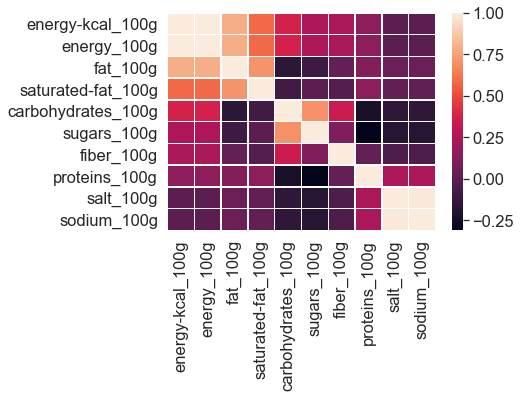

In [6]:
sns.set(font_scale=1.5) #Augmente la taille de la police des labels de 50%
ax = sns.heatmap(data.corr(), linewidths=.5)

# 4. Graphiques / Analyses univariés et multivariés

J'effectuerai dans cette partie l'ensemble des analyses univariés et multivariés

Je recrée ma liste de colonnes contenants les valeurs nutritionnelles pour 100g de produit.

In [7]:
listCols100g = data.filter(like='100g', axis=1).columns
listCols100g

Index(['energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g'],
      dtype='object')

## 4.1 PairPlot

La fonction **PairPlot** créé une grille d'axes de telle sorte que chaque variable numérique <br>
des données sera partagée sur l'axe des y sur une seule ligne et sur l'axe des x sur une seule colonne. <br>
Les Axes diagonaux sont traités différemment, en traçant un graphique pour montrer <br>
la distribution univariée des données pour la variable dans cette colonne.

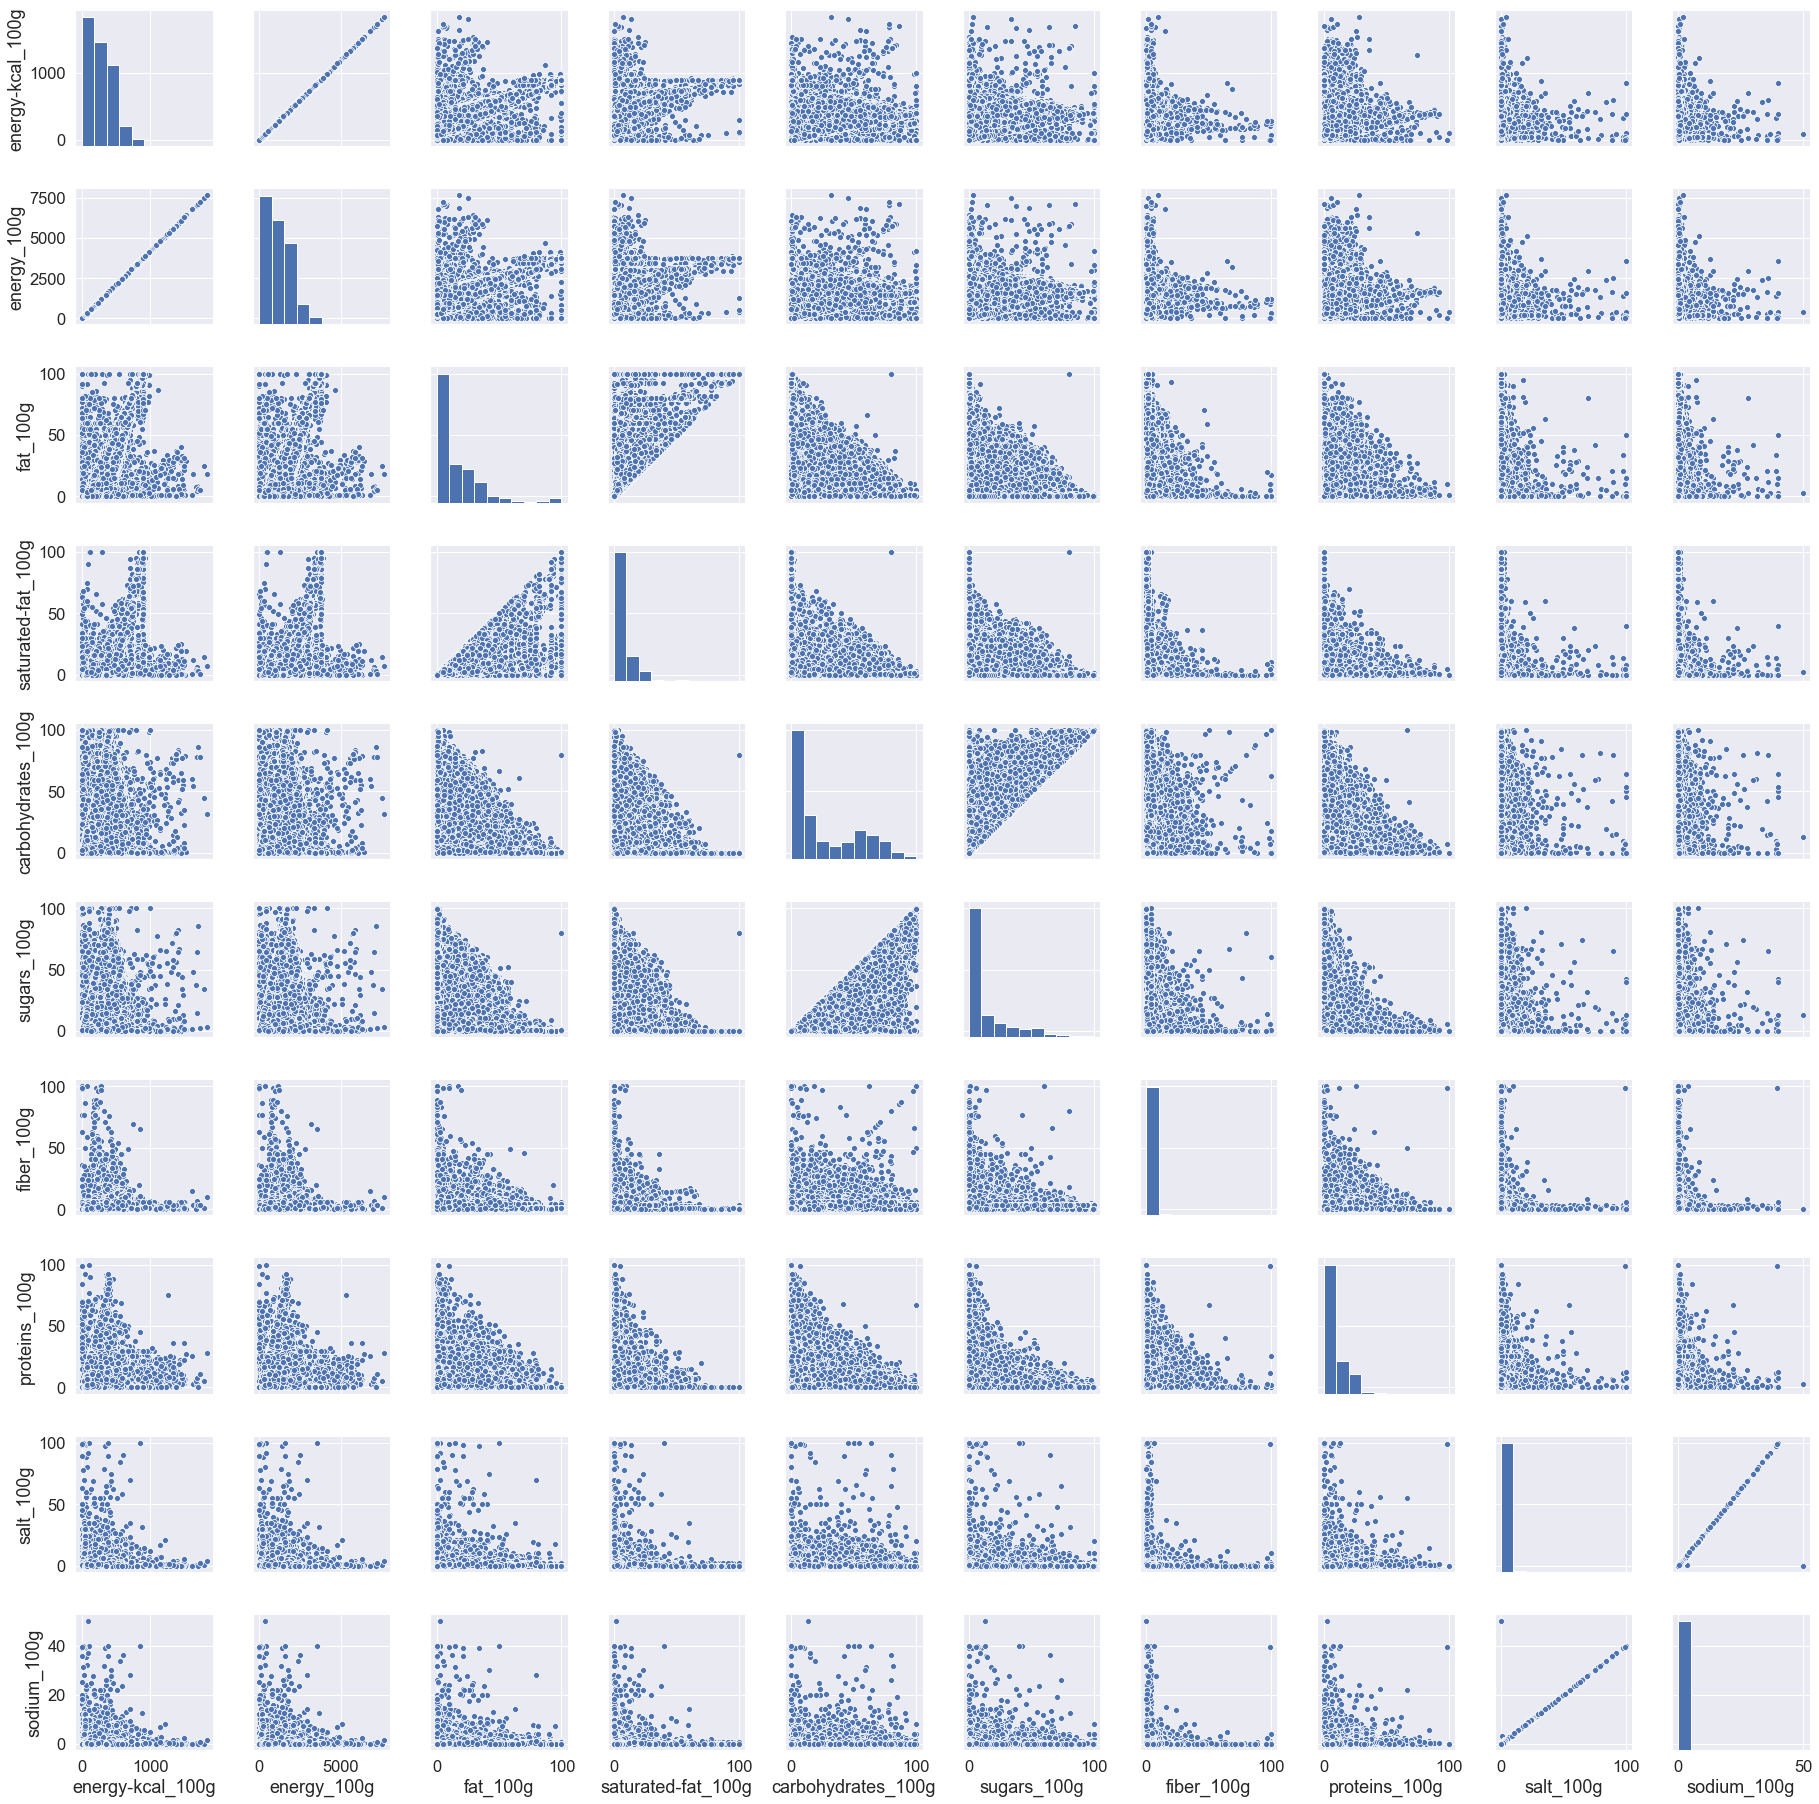

In [8]:
sns.pairplot(data[listCols100g])

## 4.2 Analyse de features numériques avec graphiques de distribution

J'affiche ci-dessous la distribution de chaque valeurs nutritionnel sur 100g.<br>
Je regroupe par pair les features de la même famille (gras / sucre / sel / energie).

Text(0, 0.5, 'Distribution')

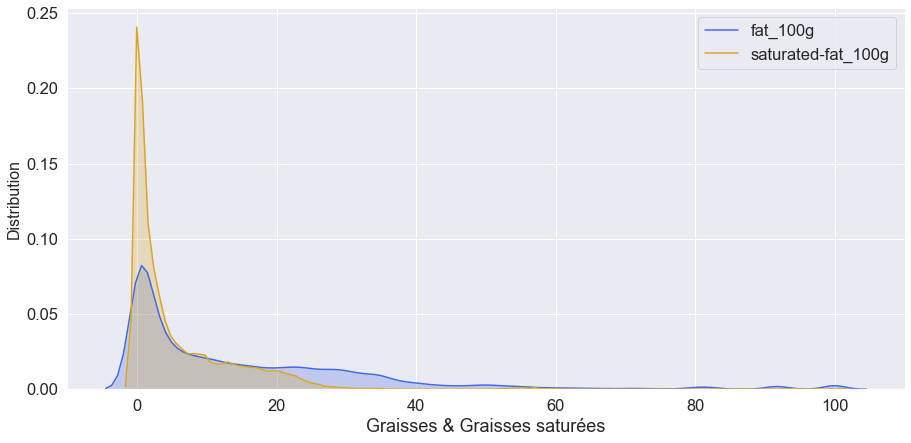

In [9]:
f, axes = plt.subplots(figsize=(15, 7))
sns.despine(left=True)

sns.kdeplot(data.fat_100g, label='fat_100g', color='royalblue', shade=True)
sns.kdeplot(data['saturated-fat_100g'], label='saturated-fat_100g', color='goldenrod', shade=True)
plt.xlabel('Graisses & Graisses saturées', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

Text(0, 0.5, 'Distribution')

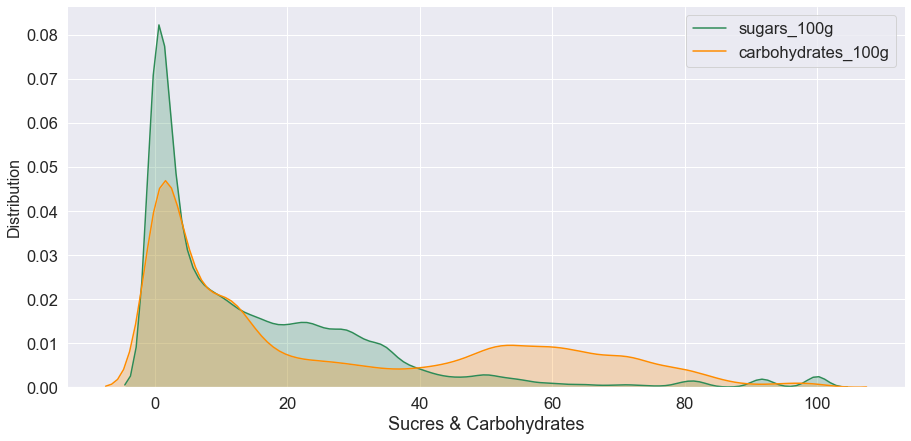

In [10]:
f, axes = plt.subplots(figsize=(15, 7))
sns.despine(left=True)

sns.kdeplot(data.fat_100g, label='sugars_100g', color='seagreen', shade=True)
sns.kdeplot(data.carbohydrates_100g, label='carbohydrates_100g', color='darkorange', shade=True)
plt.xlabel('Sucres & Carbohydrates', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

Text(0, 0.5, 'Distribution')

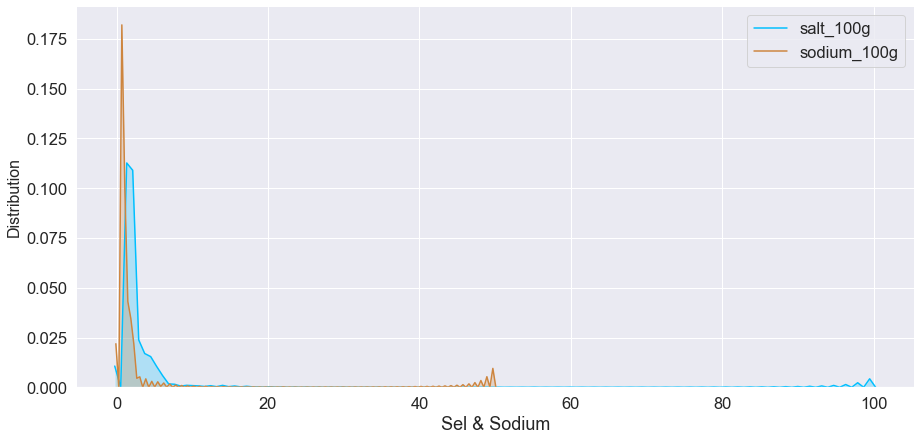

In [11]:
f, axes = plt.subplots(figsize=(15, 7))
sns.despine(left=True)

sns.kdeplot(data.salt_100g, label='salt_100g', color='deepskyblue', shade=True)
sns.kdeplot(data.sodium_100g, label='sodium_100g', color='peru', shade=True)
plt.xlabel('Sel & Sodium', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

Text(0, 0.5, 'Distribution')

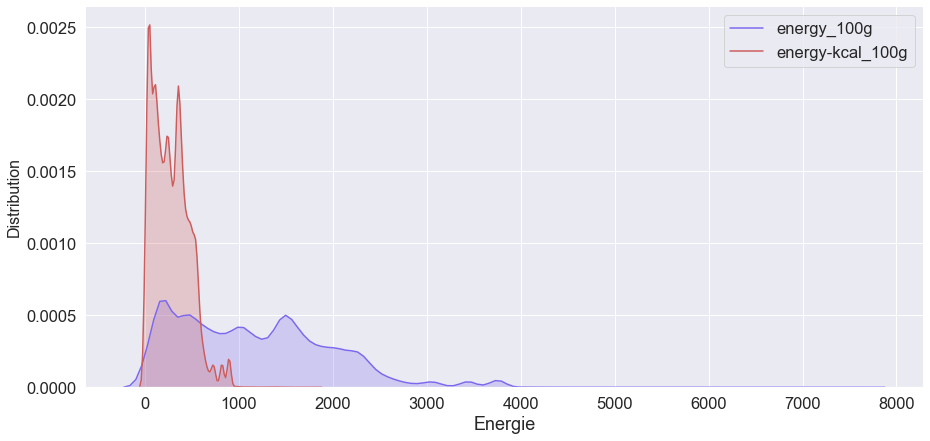

In [12]:
f, axes = plt.subplots(figsize=(15, 7))
sns.despine(left=True)

sns.kdeplot(data.energy_100g, label='energy_100g', color='mediumslateblue', shade=True)
sns.kdeplot(data['energy-kcal_100g'], label='energy-kcal_100g', color='indianred', shade=True)
plt.xlabel('Energie', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

Text(0, 0.5, 'Distribution')

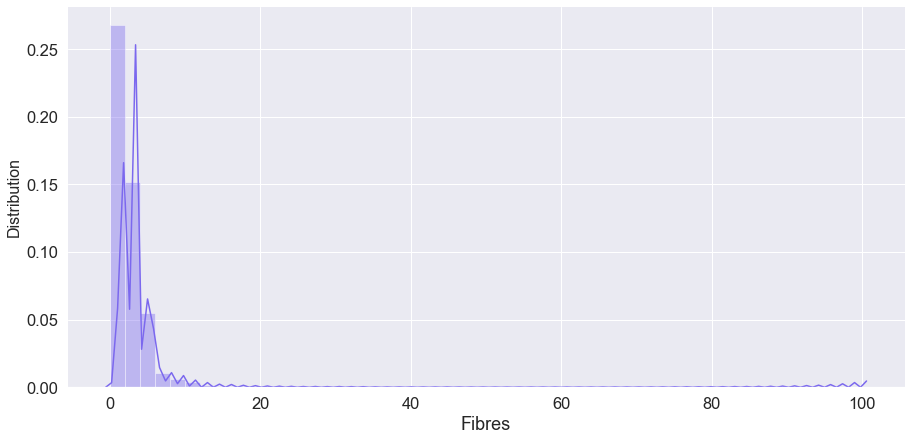

In [13]:
f, axes = plt.subplots(figsize=(15, 7))
sns.despine(left=True)

sns.distplot(data.fiber_100g, color='mediumslateblue')
plt.xlabel('Fibres', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

Text(0, 0.5, 'Distribution')

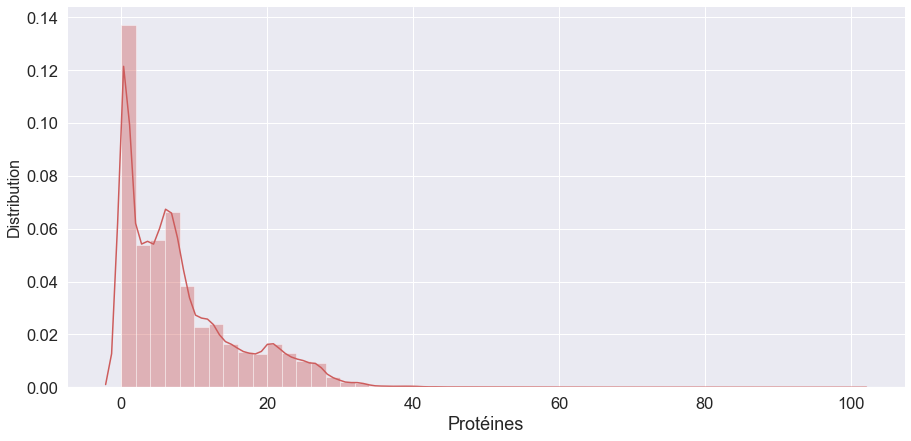

In [14]:
f, axes = plt.subplots(figsize=(15, 7))
sns.despine(left=True)

sns.distplot(data.proteins_100g, color='indianred')
plt.xlabel('Protéines', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

## 4.3 Analyse de features catégorielles

J'affiche la répartition des produits en fonction du **nutrigrade** avec un **diagramme circulaire**.

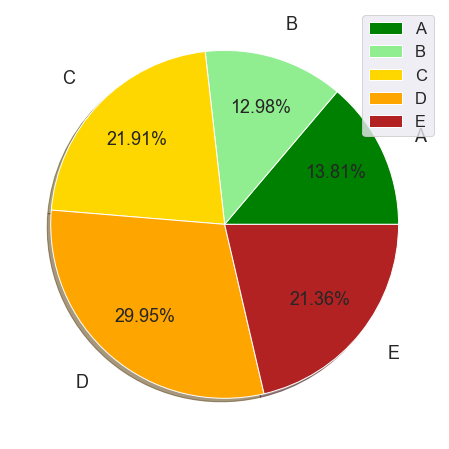

In [15]:
plt.figure(figsize = (8, 8))
x = data.nutrigrade.value_counts().sort_index()
plt.pie(x, labels = ['A', 'B', 'C', 'D', 'E'],
           textprops={'fontsize': 18},
           colors = ['green', 'lightgreen', 'gold', 'orange', 'firebrick'],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.2,
           shadow = True)
plt.legend()

Les produits *sains* ne sont pas les mieux représentés avec seulement **26.79%** <br>
(catégorie '**A**' avec **13.79%** et '**B**' avec **13%**).<br>
Notre jeux de donnée est majoritairement renseignés avec des produits classés <br>
en catégorie '**D**' (près de **30%** des produits ayant l'avant dernière note renseignant <br>
sur la qualité nutritionnelle), suivi par des produits classé en catégorie '**C**' avec <br>
**21.91%** puis '**E**' avec **21.37%**

## 4.4 BoxPlot

### 4.4.1 Mise en evidence des outliers dans les features nutritionnelles sur 100g.

A l'aide de graphiques BoxPlot, j'affiche ci-dessous, pour **chaque valeur nutritionnel**, <br>
la **répartition de ses valeurs de 0 à 100g**.<br>
Je sépare les nutriments et l'apport en énergie car les échelles de valeurs ne sont pas les mêmes.<br>
Enfin, j'affiche également les outliers sous forme de tableau afin de pouvoir constater <br>
rapidement et efficacement si des valeurs d'outliers sembles semble provenir d'erreurs de saisie.

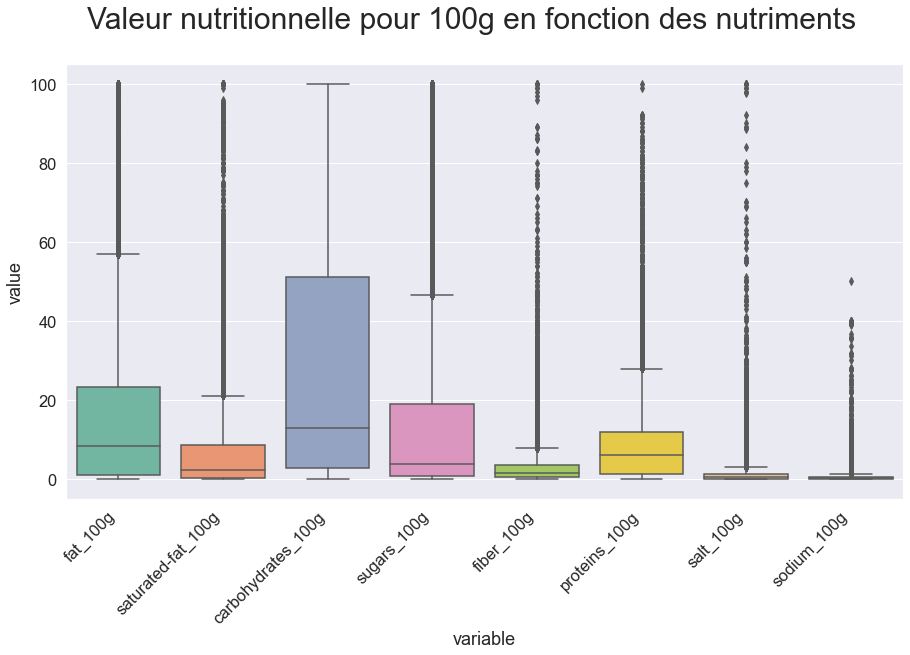

In [16]:
fig = plt.figure(figsize=(15,8))
fig.suptitle('Valeur nutritionnelle pour 100g en fonction des nutriments', 
             fontsize=30)

chart = sns.boxplot(
    data=pd.melt(data[['fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g']]),
    x='variable',
    y='value',
    palette='Set2'
)

chart.set_xticklabels(chart.get_xticklabels(),
                      rotation=45, 
                      horizontalalignment='right',
                      fontweight='light');


J'affiche ici la répartition des valeurs énergétiques pour 100g, <br>
pour les valeurs renseignées en kilocalories et en kilojoules.

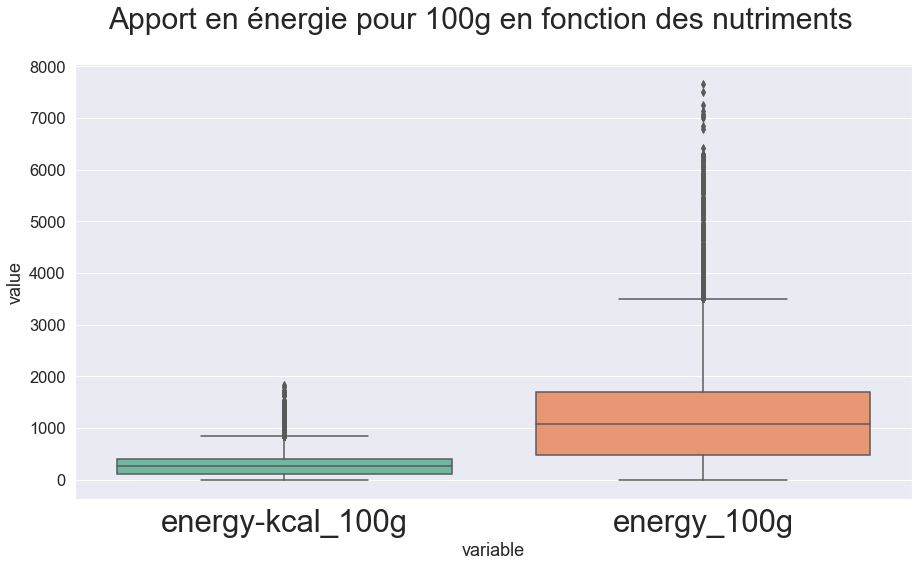

In [17]:
fig = plt.figure(figsize=(15,8))
fig.suptitle('Apport en énergie pour 100g en fonction des nutriments', 
             fontsize=30)

chart = sns.boxplot(
    data=pd.melt(data[['energy-kcal_100g', 'energy_100g']]),
    x='variable',
    y='value',
    palette='Set2'
)

chart.set_xticklabels(chart.get_xticklabels(),
                      fontweight='light',
                      fontsize='xx-large');

<u>Tableau des outliers de la feature '**energy_100g**'</u> :

Les <u>outliers</u> (ou valeurs aberrantes) sont généralement définis <br>
comme toutes valeurs extrêmes, supérieure ou inférieure à X fois <br>
l’**écart interquartile IQR**. <br>
Généralement **X** vaut '**1,5**'.<br>
L’**écart interquartile IQR** correspond à la **différence entre la valeur <br>
du 3ème quartile et la valeur du 1er quartile**.

In [18]:
# Calcul de l'IQR pour la features 'energy_100g'
Q1 = data['energy_100g'].quantile(0.25)
Q3 = data['energy_100g'].quantile(0.75)
IQR = Q3 - Q1

# On filtre en conservant uniquement les outliers soit 
# les valeurs supérieurs à Q3+1.5IQR
# les valeurs minimums étant 0 il n'y a pas ici d'outlier 
# sur les valeurs inférieurs
dataOutliers = data.query('energy_100g > (@Q3 + 1.5 * @IQR)')

Il y a **2424 outliers** sur la feature '**ernergy_100g**'

In [19]:
len(dataOutliers)

2420

<u>Affichage des 30 premiers outliers de la feature '**energy_100g**'</u> :

In [20]:
dataOutliers.sort_values(by='energy_100g', ascending=False).head(10)

,code,created_t,last_modified_t,product_name,nutrigrade,pnns_groups_1,pnns_groups_2,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore
597712,3254560075955,20170215,20191030,Saucisses lentilles,e,Composite foods,One-dish meals,1829.11292,7653.00000,17.90000,7.10000,31.90000,3.40000,9.70000,28.10000,4.20000,1.68000,22.00000
245272,0202459022309,20190622,20190622,2 tartelettes citron meringuées,e,Sugary snacks,Biscuits and cakes,1794.93506,7510.00000,25.00000,14.00000,45.00000,34.00000,1.40000,5.60000,0.30000,0.12000,27.00000
1159385,8007900000255,20170319,20191027,Grissini Nature Vita Vigor,d,Cereals and potatoes,Bread,1731.12046,7243.00000,5.00000,0.90000,78.00000,2.50000,3.70000,11.00000,2.00000,0.80000,15.00000
889721,4009900527644,20181003,20190316,Skittles Chewies,e,Sugary snacks,Sweets,1704.11278,7130.00000,5.83000,3.26000,86.20000,85.30000,3.47592,0.00000,0.00000,0.00000,23.00000
712161,3446882767216,20191117,20191117,forme et chocolat noir,d,Cereals and potatoes,Cereals,1689.05540,7067.00000,4.80000,2.60000,78.10000,15.00000,6.80000,7.60000,0.65000,0.26000,12.00000
404571,12263974,20200102,20200418,caramels au beurre salé,e,Sugary snacks,Sweets,1683.08025,7042.00000,8.50000,6.00000,78.00000,64.00000,3.47592,2.50000,1.10000,0.44000,29.00000
525357,30174054,20181106,20200409,Bn pocket,e,Sugary snacks,Biscuits and cakes,1673.99802,7004.00000,7.50000,3.50000,77.80000,37.50000,0.00000,5.40000,0.54000,0.21600,23.00000
237381,01442830,20181116,20190617,Lemon curd,e,Sugary snacks,Sweets,1635.99607,6845.00000,17.90000,12.30000,54.60000,48.30000,3.47592,2.60000,0.38000,0.15200,31.00000
1066696,6168651777338,20181011,20190815,lentilles corail,b,Cereals and potatoes,Legumes,1620.93869,6782.00000,1.10000,0.20000,60.10000,2.00000,15.00000,25.80000,0.02000,0.00800,0.00000
553960,3153406244008,20180925,20191113,Emmental Râpé VDC 29 %,d,Milk and dairy products,Cheese,1532.02846,6410.00000,29.00000,19.00000,0.50000,0.50000,0.50000,27.00000,0.50000,0.20000,17.00000


Les produits remontées sont tous riches en apport energetiques par nature.
Cependant, leurs valeurs en '**energy_100g**' semblent anormalement elevée.

### 4.4.2 Boxplot affichant les valeurs de '**nutriscore**' en fonction du '**nutrigrade**'

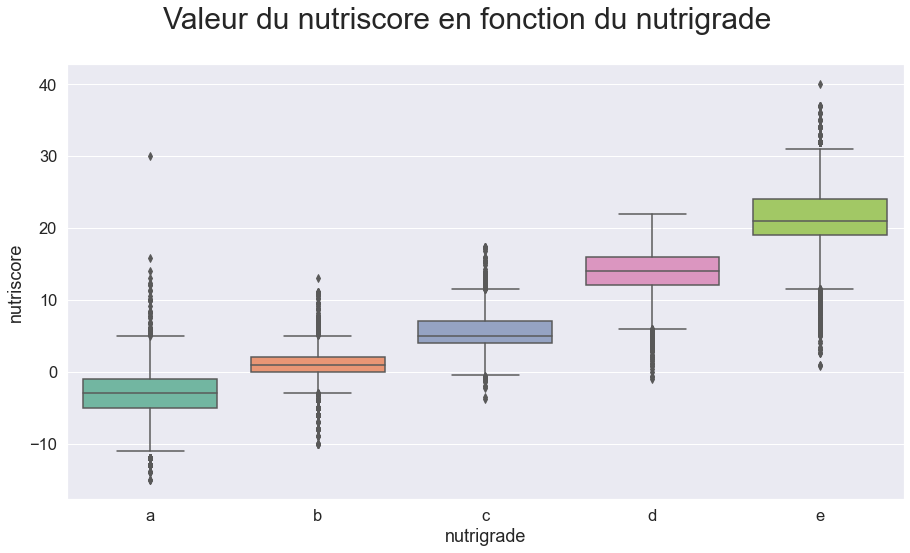

In [21]:
fig = plt.figure(figsize=(15,8))
fig.suptitle('Valeur du nutriscore en fonction du nutrigrade ', fontsize=30)

chart = sns.boxplot(
    data=data,
    x='nutrigrade',
    y='nutriscore',
    palette='Set2',
    order=data.nutrigrade.sort_values().unique()
)

Ce boxplot nous sert simplement à vérifier la cohérence des données renseignés <br>
dans notre dataframe entre les valeurs des '**nutrigrade**' et '**nutriscore**'<br>
Les deux valeurs étant intrinsèquement liées, il est important de vérifier qu'elles sont bien corrélées <br>
entre-elles, ce qui est bien le cas ici.

### 4.4.3 Boxplot représentant la valeur de chaque nutriment [*_100g] en fonction du '**nutritionscore_grade**'

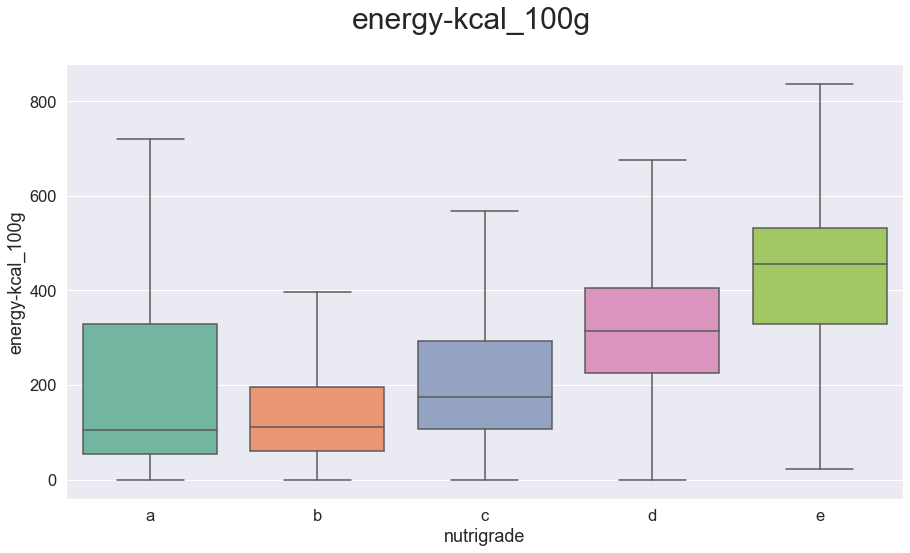

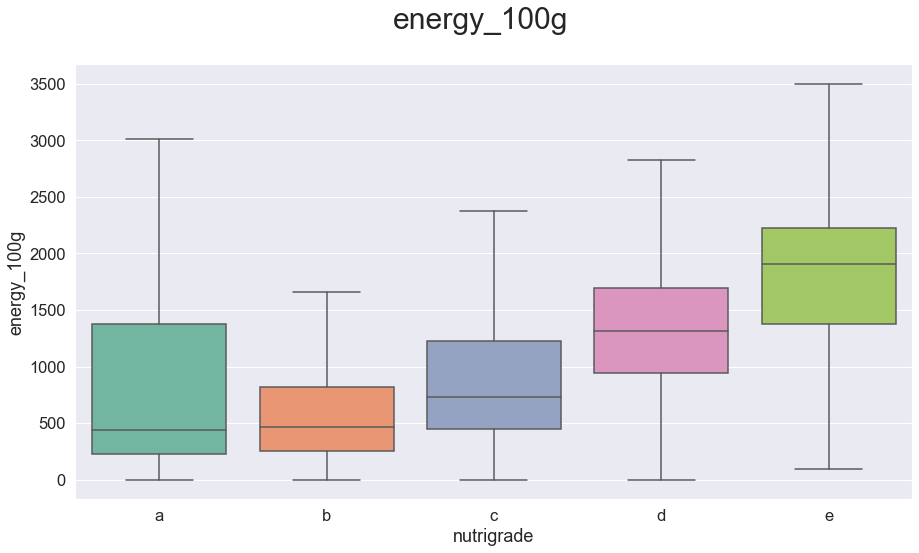

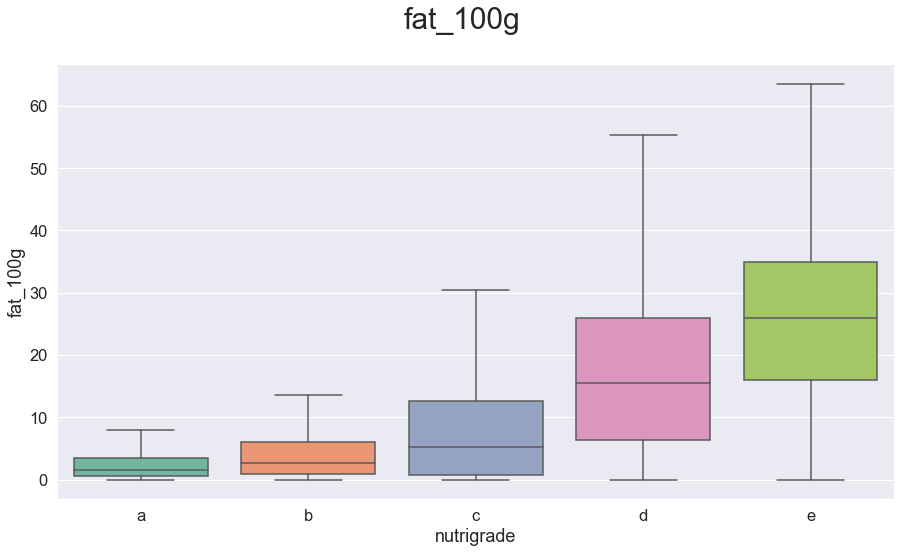

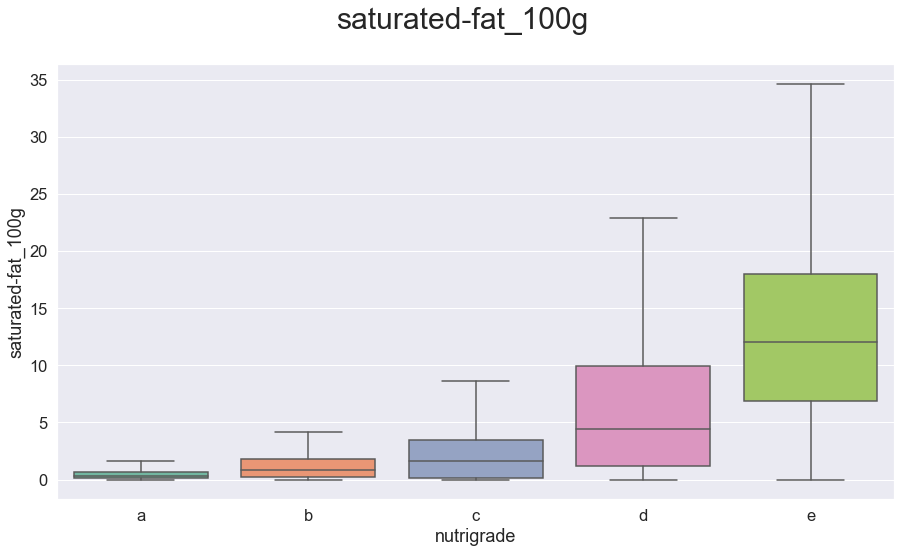

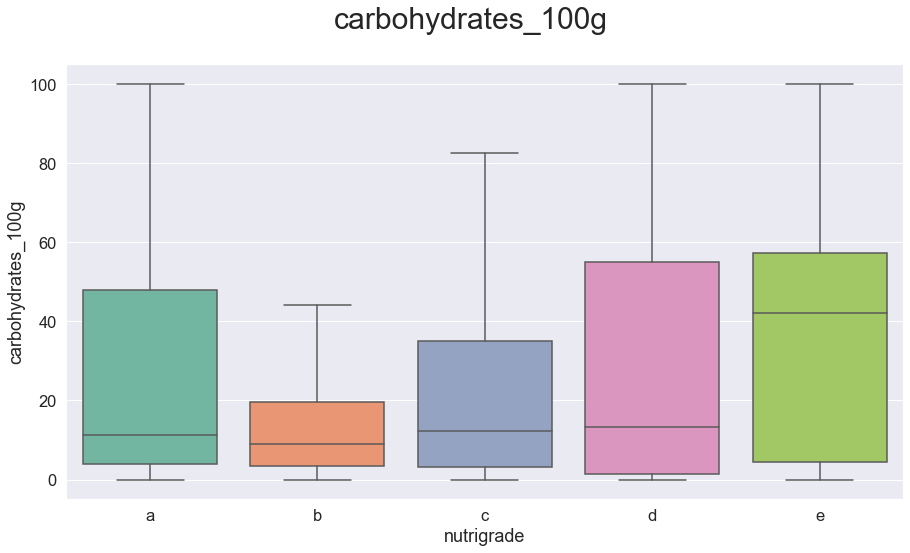

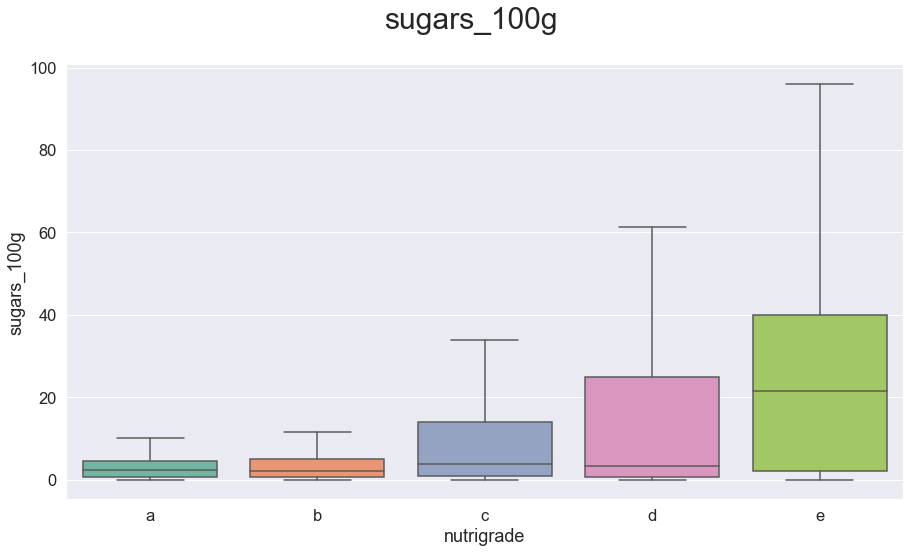

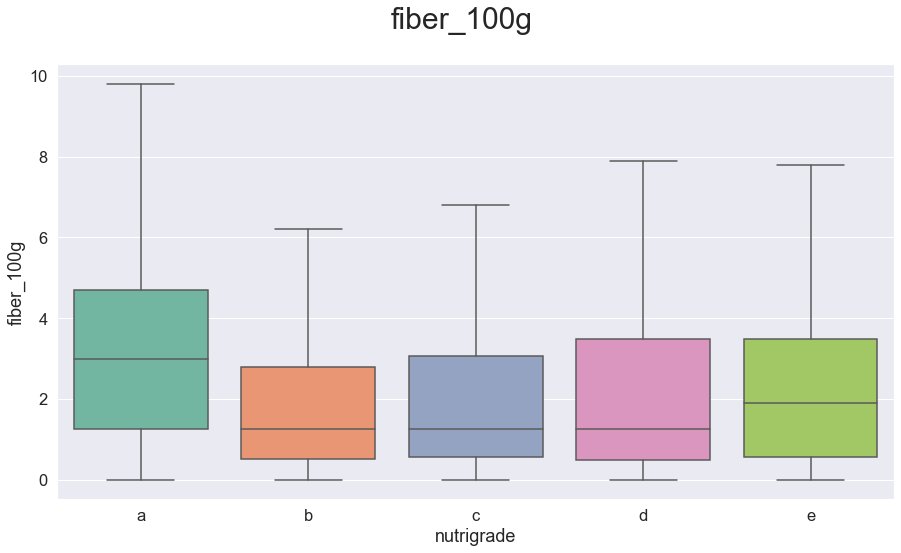

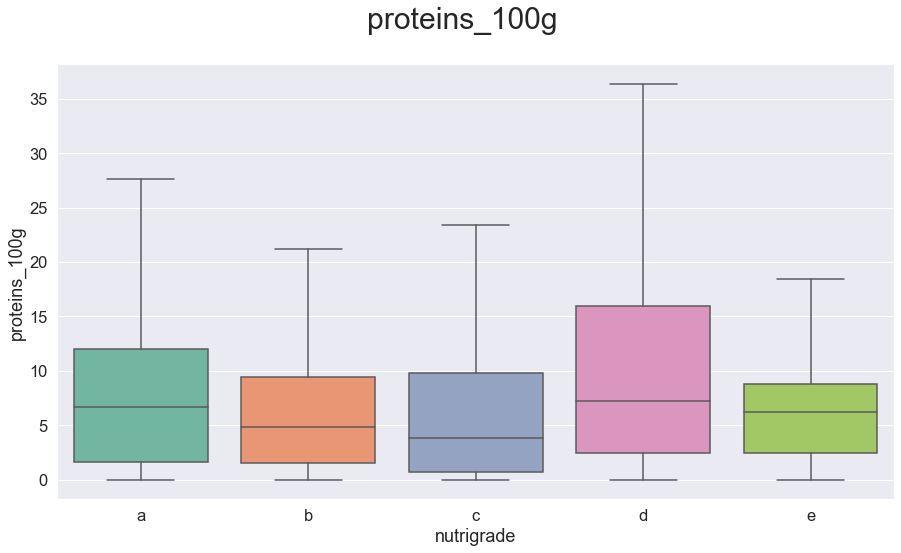

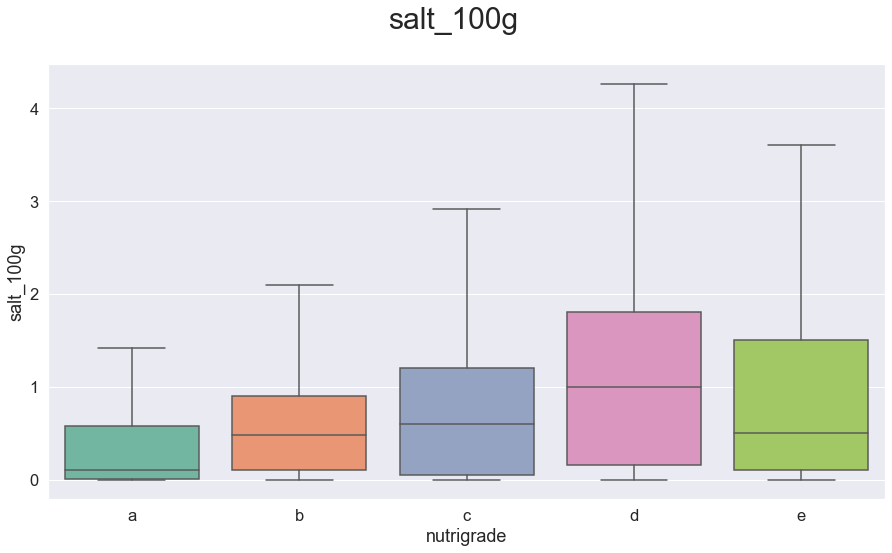

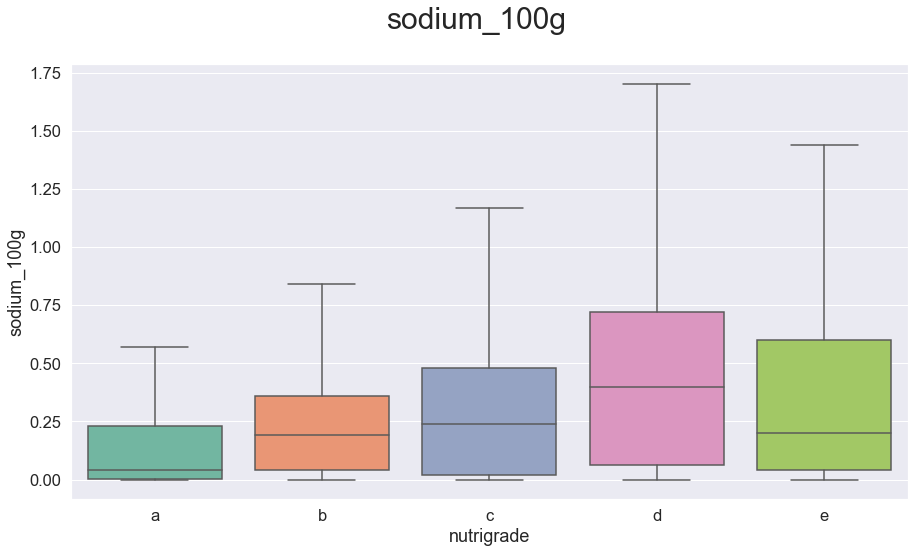

In [22]:
for nutriment in listCols100g:
  fig = plt.figure(figsize=(15,8))
  fig.suptitle(nutriment, fontsize=30)

  chart = sns.boxplot(
      data=data,
      x='nutrigrade',
      y=nutriment,
      palette='Set2',
      showfliers = False,
      order=data.nutrigrade.sort_values().unique()
  )


Il est intéressant d'observer la relation entre le '**nutrigrade**', qui informe <br>les consommateurs sur la qualité nutritionnelle d’un produit et la **valeur nutritionnel <br>pour 100g** qui compose les produits du DataFrame '**data**'.

<u>Voici la liste des valeurs nutritionnels pour 100g et leur analyse de corrélation avec le '**nutrigrade**'</u> :
- '**energy_100g**' et '**energy-kcal_100g**'
 - Les valeurs médianes sont corrélées avec la valeur du **nutrigrade**.<br>
 on note cependant que la corrélation n'est que très peu marquée entre les valeurs '**a**' et '**b**' du **nutrigrade**.
  - Les deux derniers quartiles de la valeur '**a**' du '**nutrigrade**' ne sont pas corrélés avec le reste des valeurs.<br> Cela est peut-être dû à des valeurs aberrantes renseignés dans le DataFrame '**data**'.
- '**fat_100g**' et '**saturated-fat_100g**'
 - Il y a ici une relation très claire de corrélation avec la valeur du '**nutrigrade**' 
- '**carbohydrates_100g**'
 - La valeur '**a**' n'est pas corrélé avec les autres valeurs du '**nutrigrade**'.<br>
 comme pour '**energy_100g**' et '**energy-kcal_100g**' il peut s'agir de valeurs aberrantes présentes dans le DataFrame.<br>Les autres valeurs sont assez corrélé et la valeur de '**carbohydrates_100g**' <br>tend à augmenter lorsque la valeur du '**nutrigrade**' augmente.
- '**sugars_100g**'
 - Ici les valeurs sont très corrélées avec le '**nutrigrade**'.<br>
La valeur de '**sugars_100g**' est très petites pour les '**nutrigrade**' de valeur '**a**' et '**b**' <br>et augmente rapidement pour les valeurs '**c**', '**d**' et '**e**'.
- '**fiber_100g**'
 - Les valeurs sont faiblement corrélées avec les valeurs de '**nutrigrade**'.<br>
ici aussi une exception est à noter avec la valeur '**a**' du '**nutrigrade**' qui semble <br>anormalement élevé comparé au reste des valeurs du '**nutrigrade**'.
- '**proteins**'
 - Il ne semble pas exister de corrélation entre la valeur de '**proteins_100g**' et la valeur du '**nutrigrade**'.<br> La valeur en protéines n'étant pas déterminant comme peut l'être le sucre ou le gras, <br>il n'est pas aberrant de na pas avoir de corrélation ici.
- '**salt_100g**' et '**sodium_100g**'
 - Il y a ici un lien fort de corrélation entre le taux de sel et la valeur du '**nutrigrade**'.<br>On notera cependant que la valeur '**e**' du '**nutrigrade**' ne représente pas <br>les valeurs les plus haute en sel, mais semble se placer à la seconde position après '**d**' quelque soit le quartile.
- '**nutriscore**'
 -Comme vu précédemment, il y a heureusement un lien fort <br>de corrélation entre le '**nutrigrade**' et la valeur du '**nutriscore**' car les valeurs mesurent la même chose.

# 5. Analyses Statistiques

## 5.1 ANOVA (ANalysis Of VAriance)

Peut-on prévoir la valeur '**nutrigrade**' d'un produit à partir d'une de ses valeurs nutritionnelles?<br>
Si oui, quelle est la valeur nutritionnel qui explique le mieux la valeur du '**nutrigrade**'?

La variable '**nutrigrade**' étant *qualitative*, et les variables nutritionnelles *quantitative* <br> 
alors l'**Analyse de la Variance** (ANOVA) nous permet de répondre à cette question.

Pour réaliser l'analyse de la variance nous devons calculer le **rapport de corrélation**, <br>
compris entre 0 et 1 et définit par : η2 = SCE / SCT

**SCT** est ici appelé *variation totale* (ou *Total Sum of Squares*).<br>
**SCE** est ici appelé *variation interclasse* (ou *Sum of Squares of the Model*).

Dans notre cas, les classes sont les modalités de '**nutrigrade**'.

Si **η2 = 0**, cela signifie que les moyennes par classes sont toutes égales.<br> 
Il n’y a donc pas a priori de relation entre la valeur nutritionnelle étudié et le '**nutrigrade**'.<br> 
Au contraire, si η2=1 , cela signifie que les moyennes par classes sont très différentes. <br>
Il existe donc a priori une relation entre la valeur nutritionnelle étudié et le '**nutrigrade**'.

La fonction **eta_squared** permet de calculer le **rapport de corrélation**

In [23]:
def eta_squared(x,y):
  # x : qualitative
  # y : quantitative
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

Je calcule le **rapport de corrélation** pour chacune des valeurs nutritionnelle de notre jeu de donnée :

In [24]:
print('Valeur de \'eta carrée\' pour :')
for n in listCols100g:
    print(n ,' = ', eta_squared(data.nutrigrade,data[n]))

Valeur de 'eta carrée' pour :
energy-kcal_100g  =  0.23889331546274725
energy_100g  =  0.23889331546274778
fat_100g  =  0.17963991368635246
saturated-fat_100g  =  0.277283594791249
carbohydrates_100g  =  0.039676431877590394
sugars_100g  =  0.13166837231698922
fiber_100g  =  0.03515596318258195
proteins_100g  =  0.025506791974166342
salt_100g  =  0.03757333061573495
sodium_100g  =  0.0370355062346794


Les valeurs des **rapports de corrélation** restent assez éloignées de 1.<br>
Cependant, on observe que les valeurs nutritionnelles qui expliquent <br>
le mieux la valeur du '**nutrigrade**' sont :
1. '**saturated-fat_100g**'
2. '**energy_100g**' et '**energy_100g**'
3. '**fat_100g**'
4. '**sugars_100g**'

J'affiche ci-dessous les graphiques représentant la répartition des valeurs nutritionnels des produits en fonction du '**nutrigrade**'.
Les barres noires au sommet des barres représentent la variation interclasse.

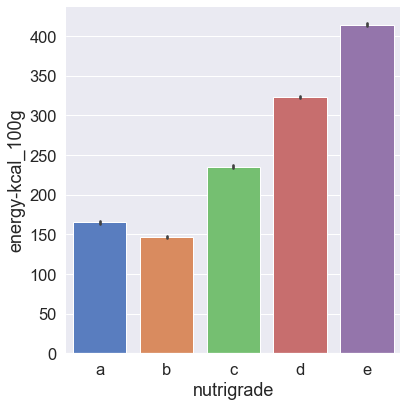

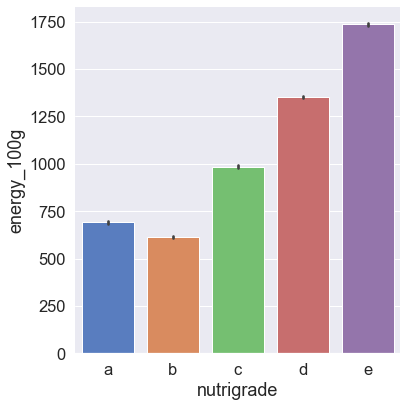

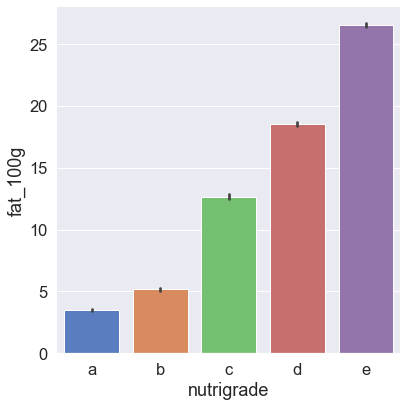

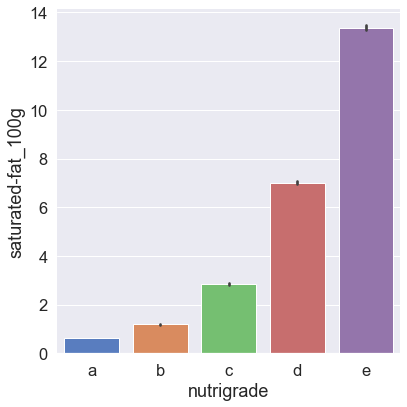

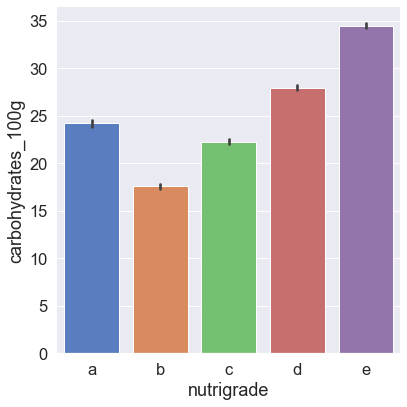

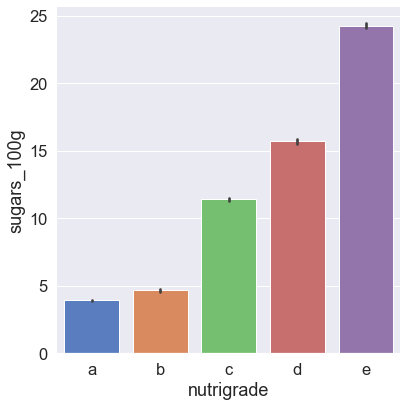

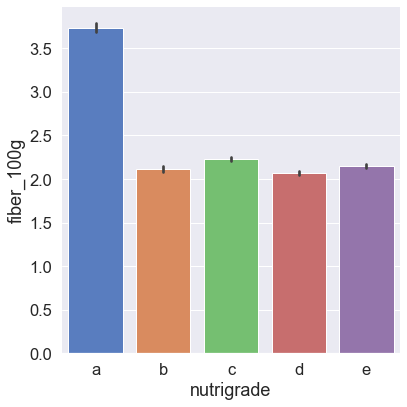

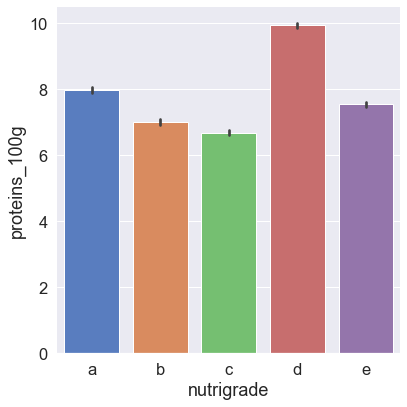

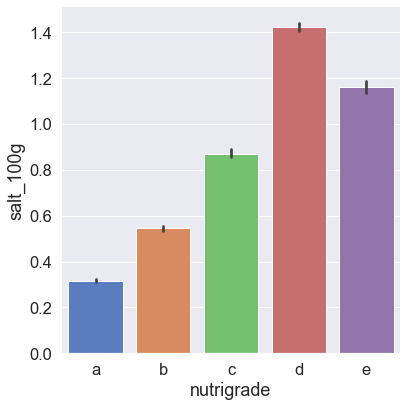

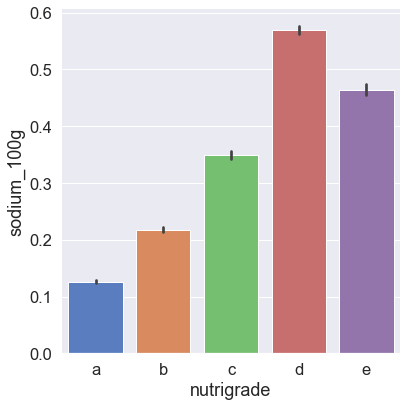

In [25]:
for n in listCols100g:
    g = sns.catplot(x="nutrigrade", 
                    y=n, 
                    data=data,
                    height=6, 
                    kind="bar", 
                    palette="muted", 
                    order=data.nutrigrade.sort_values().unique())
    g.despine(left=True)

Nous constations que les variations interclasse sont beaucoup plus importantes <br>
que les variation intraclasse.<br>
Cela nous aide à comprendre le faible taux d'*eta-carré* constaté précédemment.

## 5.2 ACP : Analyse en Composante Principale

J'utiliserai ici l'ACP pour étudier les liaisons entre les variables (ou features).<br>
Existe t'il ici des groupes de variables très corrélées entre elles <br>
qui peuvent être regroupées en de nouvelles variables synthétiques ?

Je réalise ici une ACP normée, c'est à dire une ACP Centrée Réduite.

In [26]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            # plt.show(block=False)
            plt.show()
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

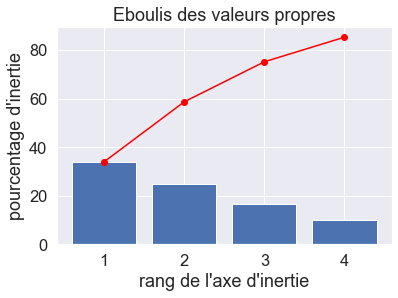

In [27]:
from sklearn import decomposition
from sklearn import preprocessing

# choix du nombre de composantes à calculer
n_comp = 4

# sélection des colonnes à prendre en compte dans l'ACP
data_pca = data[listCols100g]

# préparation des données pour l'ACP
X = data_pca.values
names = data.index
features = listCols100g

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

plt.show()

On observe grâce à l'**éboulis des valeurs propres** que **90%** de l'**inertie totale** est associés aux **4 premiers axes d'inertie**.

## 5.3 Affichage et interprétation des cercles des corrélations

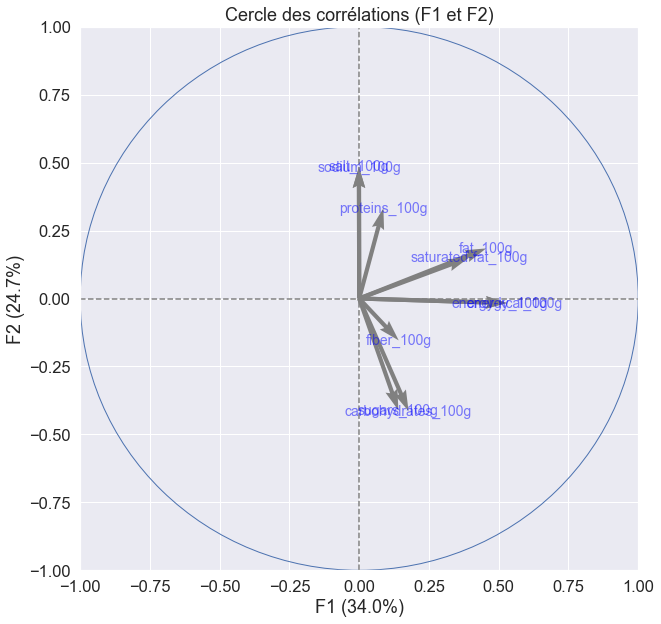

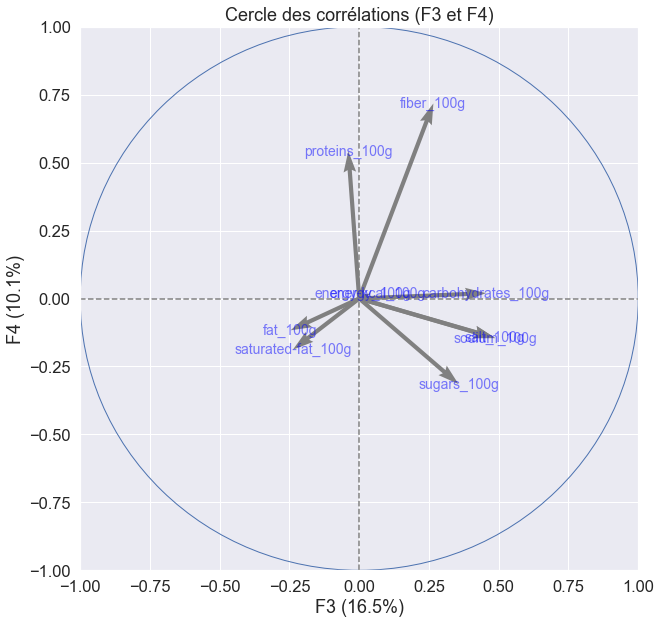

In [28]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

Sur le cercle des corrélation **F1** (34%) et **F2** (24.7%) :
- '**energy_100g**' et '**energy-kcal_100g**' sont corrélés à **plus de 50%** sur l'axe **F1** mais **proche de 0%** sur l'axe **F2**.
- '**fat_100g**' et '**saturated-fat_100g**' sont corrélés à un **peu moins de 50%** sur l'axe **F1** et à **environ 17%** sur l'axe **F2**.
- '**salt_100g**', '**sodium_100g**' ne sont pas corrélé à **F1** (**0%**) mais corrélé à **F2** à **près de 50%**.
- '**carbohydrates_100g**', '**sugars_100g**' sont peu corrélés à **F1** (moins de **25%**) mais très anti-corrélés à **F2** (un peu **moins de 50%**)
- Les autres variables sont mal représentées sur ces axes d'inertie

Sur le cercle des corrélation **F3** (34%) et **F4** (**10.1%**) :
- '**carbohydrates_100g**' est corrélé à **presque 50%** sur l'axe **F3** et **proche de 0%** sur l'axe **F4**
- '**sugars_100g**' est corrélé à **près de 40%** sur l'axe **F3** et est anti-corrélé à **près de 30%** sur l'axe **F4** 
- '**salt_100g**', '**sodium_100g**' sont corrélés à **50%** sur l'axe **F3** et sont un peu anti-corrélés (**15%**) sur l'axe **F4** 
- '**fiber_100g**' est corrélé à **30%** sur l'axe **F1** et à **70%** sur l'axe **F4**
- '**proteins_100g**' n'est pas corrélé à l'axe **F3** mais est corrélé à un peu **plus de 50%** sur l'axe **F4**.

<u>Interprétation des axes d'inertie</u> :

Il m'est difficile d'interpréter clairement l’ensemble des axes d'inertie.<br>
Cependant **F1** semble être lié à la *richesse calorique* des aliments.

<u>F1 est une combinaison linéaire des autres variables</u> :

In [29]:
F1 = pca.components_[0]
print(F1)
print(listCols100g)

[ 0.52913397  0.52913397  0.45496093  0.39298072  0.17697606  0.14042445
  0.14154257  0.08680686 -0.00089785 -0.00105175]
Index(['energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g'],
      dtype='object')


<u>Ainsi F1 correspond à la combinaison linéaire des variables [*_100g] suivante</u> :

F1 = 0.53 * *energy-kcal_100g*<br>
    +0.53 * *energy_100g*<br>
    +0.45 * *fat_100g*<br>
    +0.39 * *saturated-fat_100g*<br>
    +0.18 * *carbohydrates_100g*<br>
    +0.14 * *sugars_100g*<br>
    +0.14 * *fiber_100g*<br>
    +0.09 * *proteins_100g*<br>
    -0.001 * *salt_100g*<br>
    -0.001 * *sodium_100g*
    
On constate que sur le premier axe d'inertie (F1), <br>
les variables qui contribuent le plus sont '**energy-kcal_100g**', <br>
'**energy_100g**' et '**fat_100g**'.

Les variables '**energy-kcal_100g**', '**energy_100g**' étant <br>
renseigné l'une par rapport à l'autre (rapport de kcal à kjoule), <br>
elles deviennent égale une fois subit la transformation de centrage réduction.


Il est possible de résumer les variables de notre DataFrame à **4 variables** (F1, F2, F3 et F4).<br>
Ces 4 variables suffisent à résumer plus de **90%** des informations contenues <br>
actuellement dans les <u>10 variables contenant les valeurs nutritionnelles [*_100g]</u>.

J'affiche ci-dessous les 4 variables F1 à F4 et leurs rapports de corrélation <br>avec les variables [\*_100g] du DataFrame '**data**'.

In [30]:
pd.DataFrame(data=[pca.components_[0], pca.components_[1], pca.components_[2], pca.components_[3]],
             index=['F'+str(i+1) for i in range(4)], 
             columns=listCols100g)

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
F1,0.52913,0.52913,0.45496,0.39298,0.17698,0.14042,0.14154,0.08681,-0.00090,-0.00105
F2,-0.01669,-0.01669,0.18421,0.14994,-0.41449,-0.41144,-0.15412,0.33200,0.48414,0.48329
F3,0.03926,0.03926,-0.24602,-0.23758,0.45479,0.35584,0.26584,-0.03909,0.48654,0.48741
F4,0.01797,0.01797,-0.11696,-0.18821,0.01951,-0.31473,0.71756,0.54202,-0.14438,-0.14588


# Fin de l'exploration du DataFrame '**data**'